Iris Flowers Classification Project

To implement the oveall code we have to imports necessary libraries for data analysis and ML modeling, including numpy, pandas, matplotlib, seaborn, and scikit-learn. As we will be performing tasks such as data reading, visualization, and applying a logistic regression model on the Iris Flowers dataset.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
#Reading data using Pandas library
data = pd.read_csv('Iris.csv') 
data_header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
data.to_csv('Iris.csv',header = data_header,index = False)
new_data = pd.read_csv('Iris.csv')
new_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking numbers of rows and columns
print("Shape of the DataFrame: ", new_data.shape)


Shape of the DataFrame:  (150, 5)


In [4]:
# Basic information about the DataFrame
print("Information about the DataFrame: ")
print(new_data.info())

Information about the DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
# Descriptive statistics of the DataFrame
print("Descriptive statistics of the DataFrame: ")
print(new_data.describe())

Descriptive statistics of the DataFrame: 
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [6]:
# Checking for missing values
print("Number of missing values in each column: ")
print(new_data.isnull().sum())

Number of missing values in each column: 
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


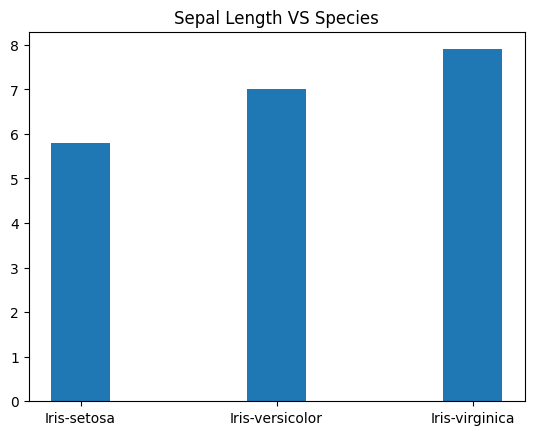

In [7]:
# Visualizing Sepal Length vs Species
plt.bar(new_data['Species'], new_data['SepalLength'], width=0.3)
plt.title("Sepal Length VS Species")
plt.show()

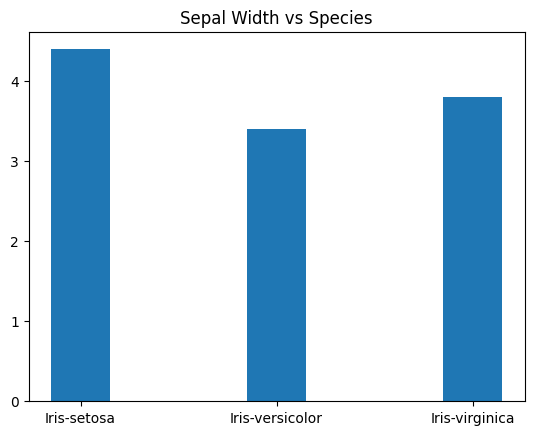

In [8]:
# Visualizing Sepal Width vs Species
plt.bar(new_data['Species'], new_data['SepalWidth'], width=0.3)
plt.title('Sepal Width vs Species')
plt.show()

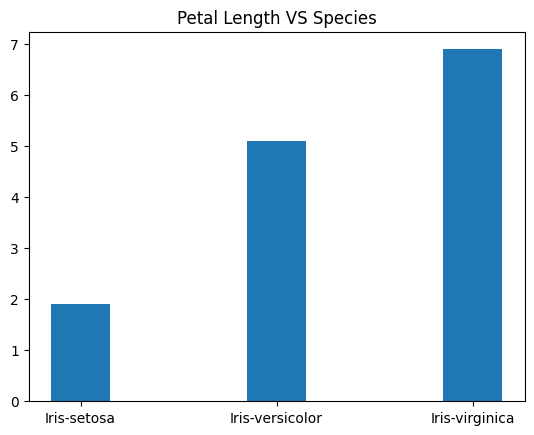

In [9]:
# Visualizing Petal Length vs Species
plt.bar(new_data['Species'], new_data['PetalLength'], width=0.3)
plt.title('Petal Length VS Species')
plt.show()

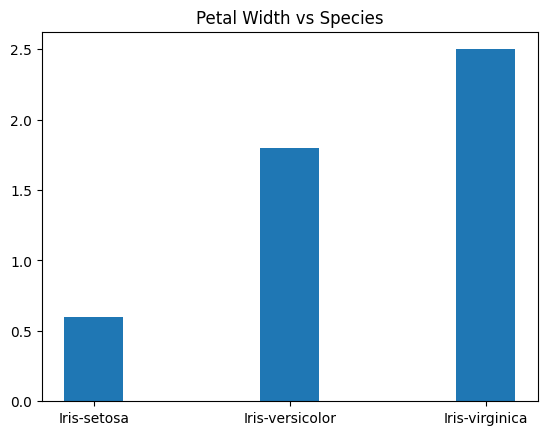

In [10]:
# Visualizing Petal Width vs Species
plt.bar(new_data['Species'], new_data['PetalWidth'], width=0.3)
plt.title("Petal Width vs Species")
plt.show()

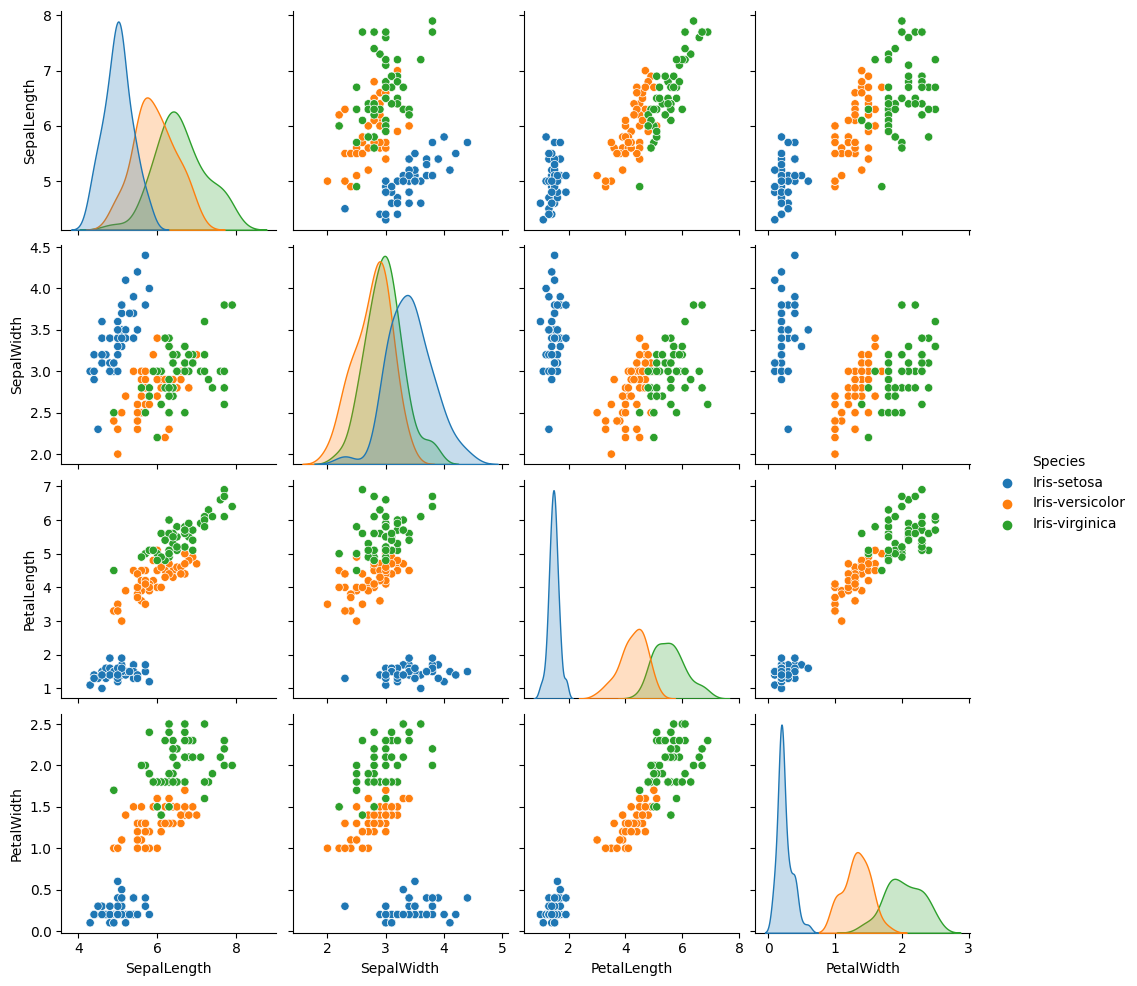

In [11]:
# Pairplot of the features
sns.pairplot(new_data, hue='Species')

In [13]:
x= new_data.drop(columns="Species")
y= new_data["Species"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=1)
x_train.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


In [14]:
x_test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [15]:
y_train.head()

11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: Species, dtype: object

In [16]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [17]:
print("x_Train :",len(x_train))
print("x_Test :",len(x_test))
print("y_Train :",len(y_train))
print("y_Test :",len(y_test))

x_Train : 90
x_Test : 60
y_Train : 90
y_Test : 60


In [18]:
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [19]:
y_pred = model.predict(x_test)
y_train_pred =model.predict(x_train)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9666666666666667
Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]


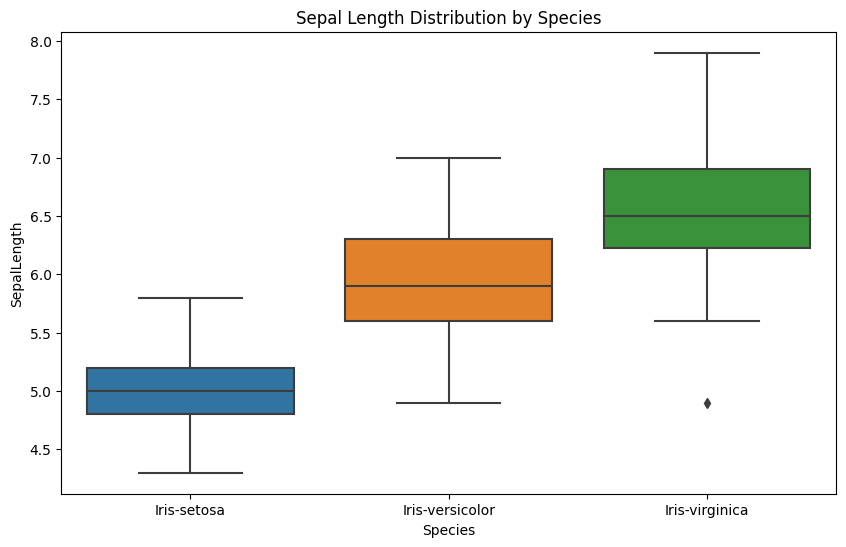

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data, x='Species', y='SepalLength')
plt.title('Sepal Length Distribution by Species')
plt.show()

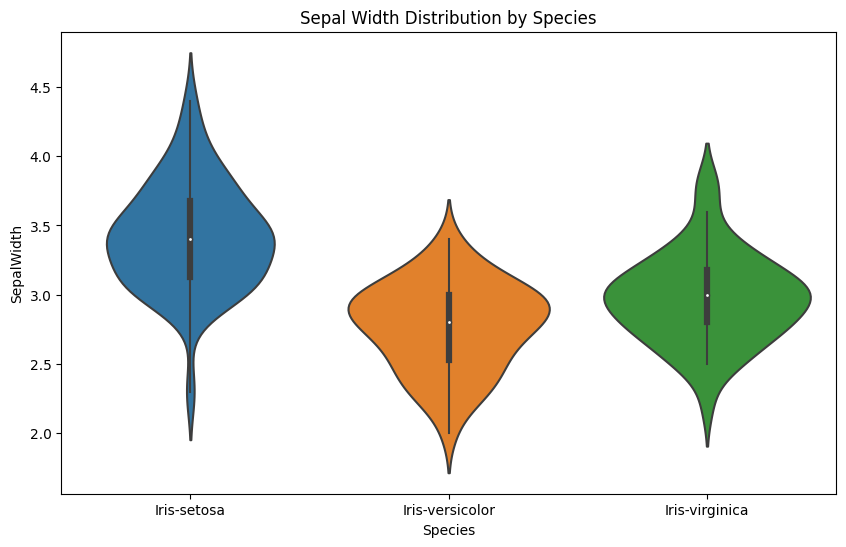

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=new_data, x='Species', y='SepalWidth')
plt.title('Sepal Width Distribution by Species')
plt.show()

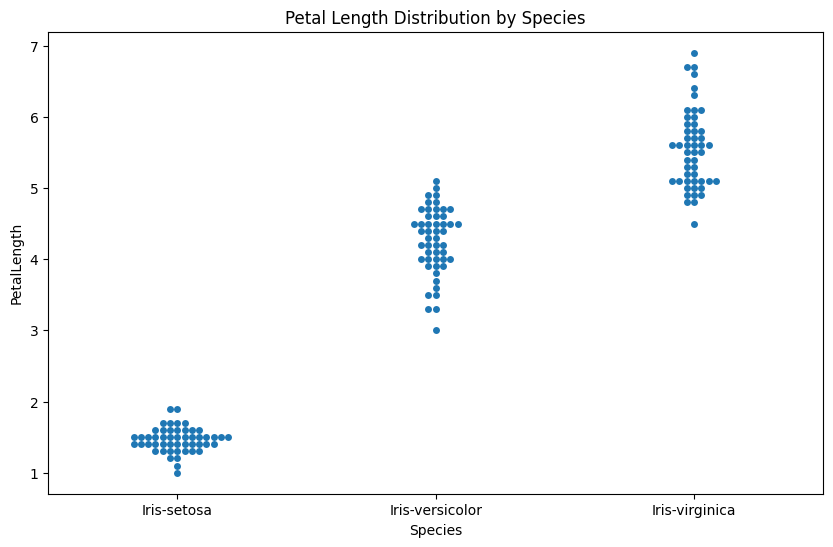

In [24]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=new_data, x='Species', y='PetalLength')
plt.title('Petal Length Distribution by Species')
plt.show()

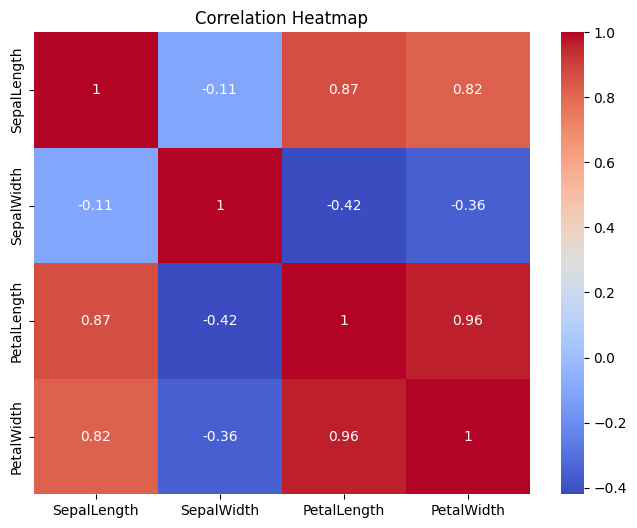

In [25]:
numeric_data = new_data.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

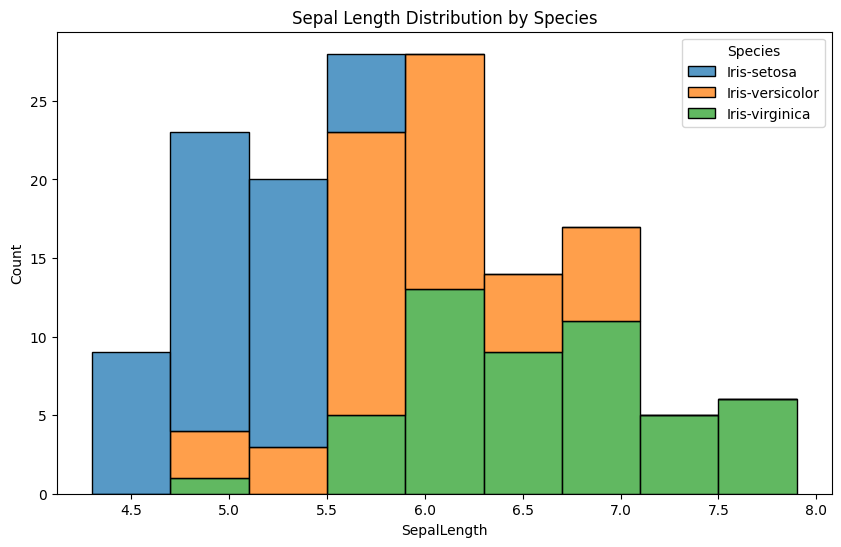

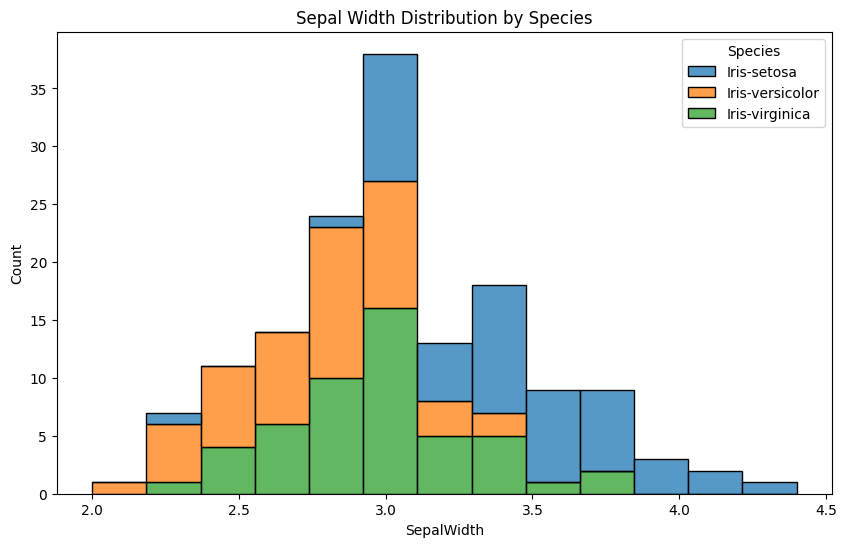

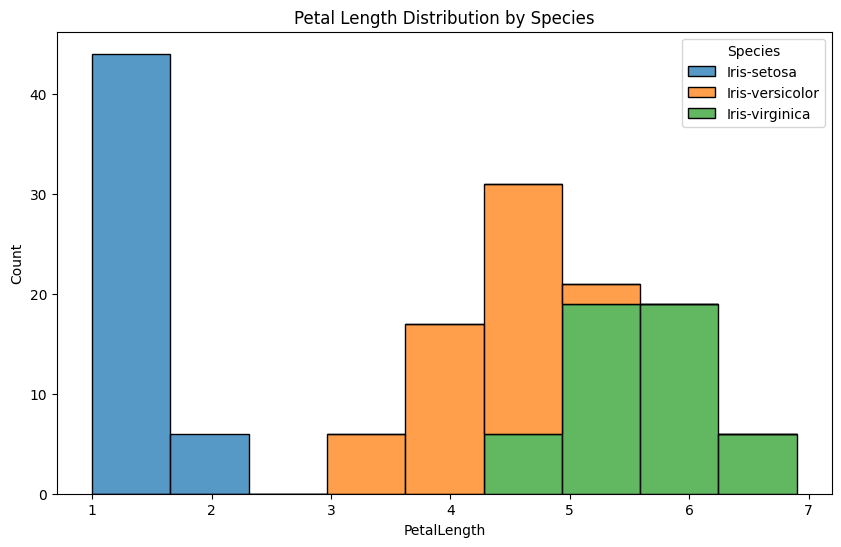

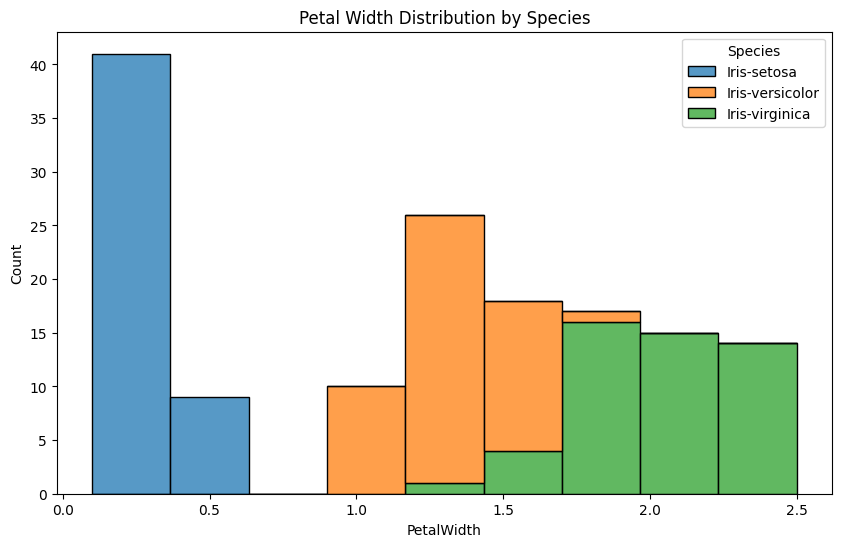

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=new_data, x='SepalLength', hue='Species', multiple='stack')
plt.title('Sepal Length Distribution by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=new_data, x='SepalWidth', hue='Species', multiple='stack')
plt.title('Sepal Width Distribution by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=new_data, x='PetalLength', hue='Species', multiple='stack')
plt.title('Petal Length Distribution by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=new_data, x='PetalWidth', hue='Species', multiple='stack')
plt.title('Petal Width Distribution by Species')
plt.show()
